# ADP 25회 실기 문제

In [ ]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem1.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,565857,84879,ASSORTED COLOUR BIRD ORNAMENT,16,9/7/2011 14:13,1.69,14911.0,EIRE
1,560452,22432,WATERING CAN PINK BUNNY,6,7/19/2011 9:51,1.95,12682.0,France
2,578509,22492,MINI PAINT SET VINTAGE,36,11/24/2011 13:17,0.65,12705.0,Germany
3,579345,22728,ALARM CLOCK BAKELIKE PINK,8,11/29/2011 11:46,3.75,12727.0,France
4,564039,21731,RED TOADSTOOL LED NIGHT LIGHT,12,8/22/2011 12:40,1.65,12645.0,Germany


```{admonition} 1번
**데이터 확인 및 전처리**     
- 1.1 EDA, 이상치 제거 후 F(소비자별 구매빈도), M(소비자별 총 구매액) feature를 새로 생성해서 그 결과값으로 탐색적 분석 실시
- 1.2 F, M feature 기반으로 군집분석 실시
- 1.3 군집 결과의 적합성을 군집 내 응집도, 군집 간 분리도의 개념을 사용해서 서술
- 1.4 적합된 군집 별 특성에 대한 의견과 비즈니스적 판단 제시
- 데이터 설명
    - InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.     
    - StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.     
    - Description: Product (item) name. Nominal.    
    - Quantity: The quantities of each product (item) per transaction. Numeric.     
    - InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.   
    - UnitPrice: Unit price. Numeric, Product price per unit in sterling.    
    - CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.     
    - Country: Country name. Nominal, the name of the country where each customer resides.   
- 출처
    - https://archive.ics.uci.edu/ml/index.phpm
```

In [ ]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem1.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,565857,84879,ASSORTED COLOUR BIRD ORNAMENT,16,9/7/2011 14:13,1.69,14911.0,EIRE
1,560452,22432,WATERING CAN PINK BUNNY,6,7/19/2011 9:51,1.95,12682.0,France
2,578509,22492,MINI PAINT SET VINTAGE,36,11/24/2011 13:17,0.65,12705.0,Germany
3,579345,22728,ALARM CLOCK BAKELIKE PINK,8,11/29/2011 11:46,3.75,12727.0,France
4,564039,21731,RED TOADSTOOL LED NIGHT LIGHT,12,8/22/2011 12:40,1.65,12645.0,Germany


## 1.1 EDA, 이상치 제거 후 F(소비자별 구매빈도), M(소비자별 총 구매액) 기반의 파생변수들을 새로 생성해서 그 결과값으로 탐색적 분석 실시

In [ ]:
#결측치가 없음을 알 수 있다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41024 entries, 0 to 41023
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    41024 non-null  object 
 1   StockCode    41024 non-null  object 
 2   Description  41024 non-null  object 
 3   Quantity     41024 non-null  int64  
 4   InvoiceDate  41024 non-null  object 
 5   UnitPrice    41024 non-null  float64
 6   CustomerID   41024 non-null  float64
 7   Country      41024 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.5+ MB


In [ ]:
# 각 수치형 변수들의 최대 최소, 1,2,3분위 수를 알 수 있다.
df.describe()

,Quantity,UnitPrice,CustomerID
count,41024.000000,41024.000000,41024.000000
mean,19.425507,4.652498,13173.076102
std,44.253624,45.383856,1006.392842
min,-480.000000,0.000000,12348.000000
25%,4.000000,1.250000,12484.000000
50%,10.000000,1.950000,12647.000000
75%,16.000000,3.750000,14156.000000
max,2400.000000,4161.060000,17097.000000


이상치 처리 전


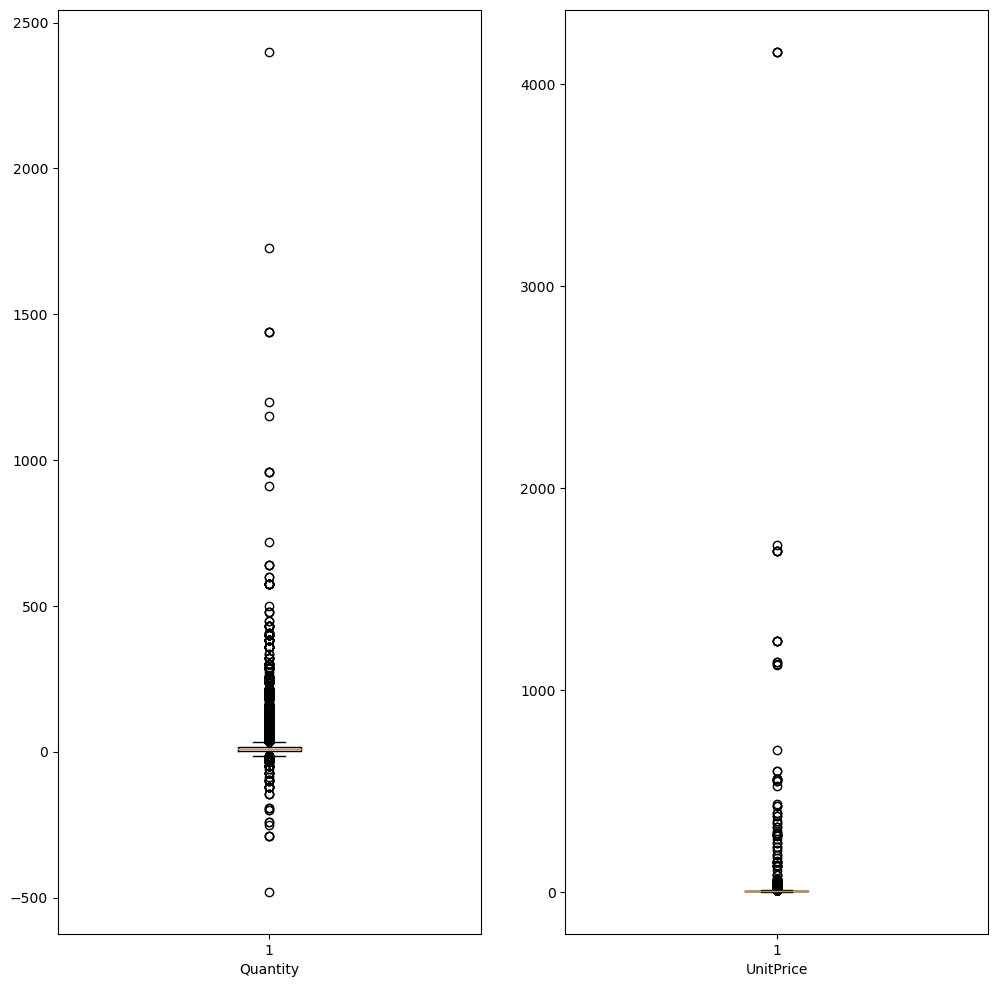

이상치 처리 후


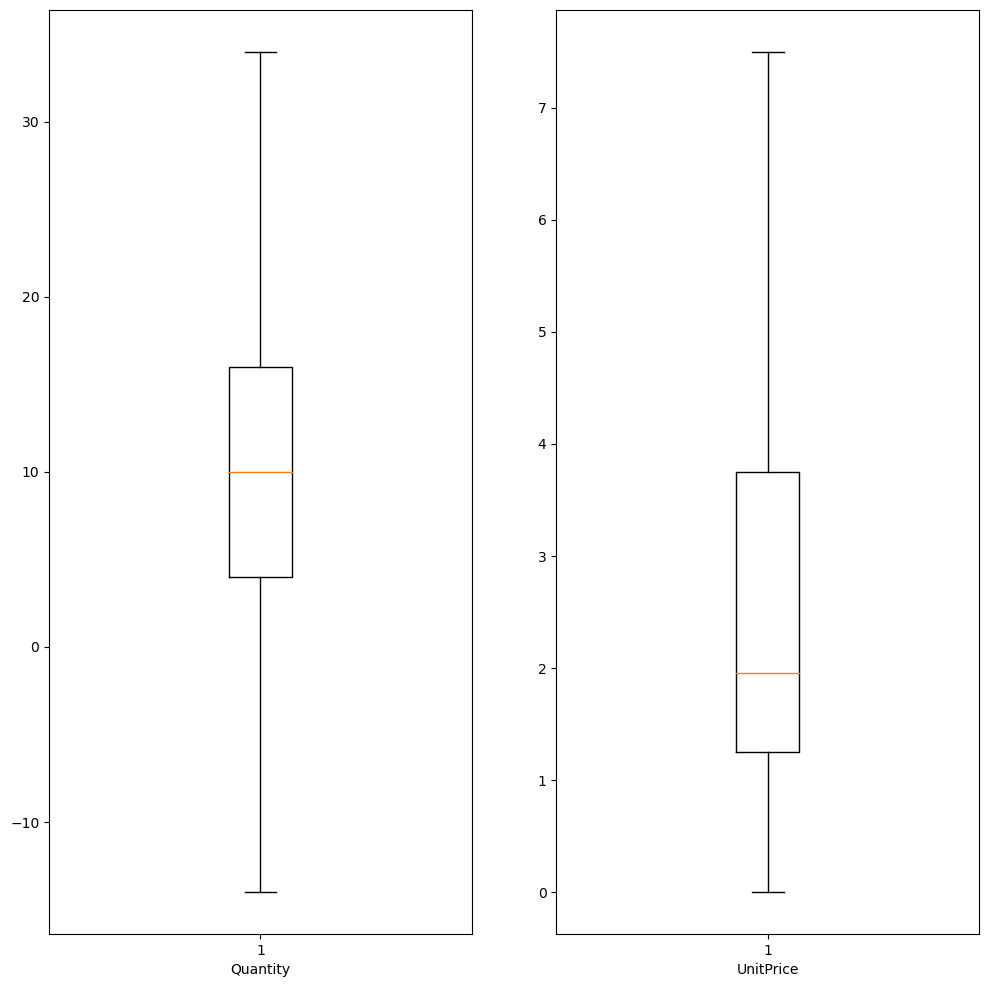

In [ ]:
#customerID는 분석상 의미가 없을 것 같아 제외하고 나머지 수치형 변수인 Quantity와 UnitPrice에 대한 이상치를 탐색하고,
#이상치를 처리한다.
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1, 2, figsize = (12,12))
print('이상치 처리 전')
for ax, col in zip(axes.ravel(),['Quantity','UnitPrice']):
    ax.boxplot(df[[col]])
    ax.set_xlabel(col)
plt.show()

print('이상치 처리 후')
# 이상치 처리

for column in ['Quantity','UnitPrice']:
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    top = df[column].quantile(0.75) + IQR * 1.5
    down = df[column].quantile(0.25) - IQR * 1.5
    df[column] = df[column].clip(down,top)

fig, axes = plt.subplots(1, 2, figsize = (12,12))
for ax, col in zip(axes.ravel(),['Quantity','UnitPrice']):
    ax.boxplot(df[[col]])
    ax.set_xlabel(col)
plt.show()




In [ ]:

df['date'] = pd.to_datetime(df['InvoiceDate']).dt.date
F = df.groupby('CustomerID').count()['date']

df['price'] = df['UnitPrice'] * df['Quantity']
M = df.groupby('CustomerID').sum('price')
M = M['price']

F.to_frame()
M.to_frame()

df_new = pd.concat([F, M], axis = 1)
df_new.columns = ['F', 'M']

In [ ]:
#df_new의 기술통계량 확인
df_new.describe()

,F,M
count,348.000000,348.000000
mean,117.885057,2637.439023
std,354.247025,9129.834977
min,1.000000,-7.500000
25%,23.000000,395.787500
50%,51.500000,858.670000
75%,113.250000,2347.925000
max,5903.000000,113026.240000


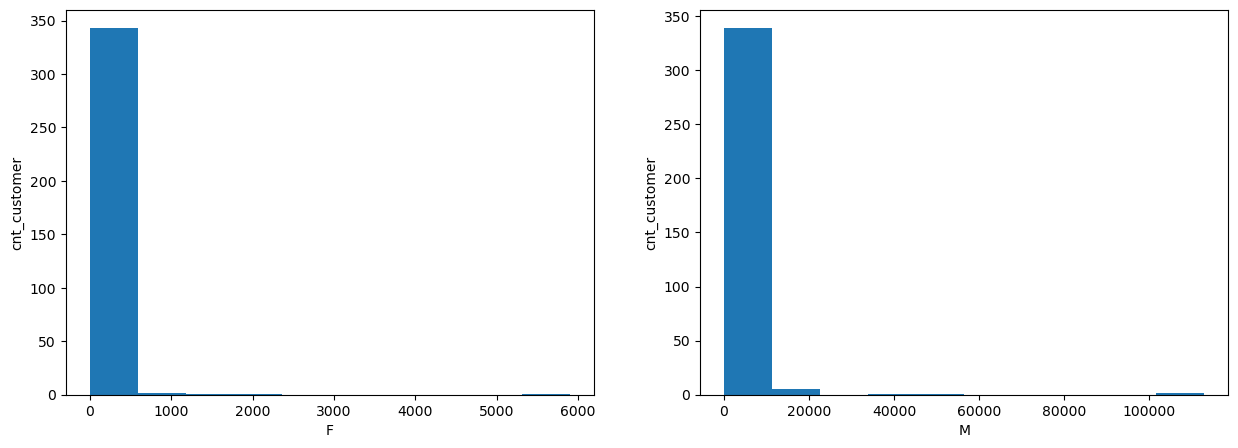

In [ ]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.hist(df_new['F'])
plt.xlabel('F')
plt.ylabel('cnt_customer')

plt.subplot(1, 2, 2)
plt.hist(df_new['M'])
plt.xlabel('M')
plt.ylabel('cnt_customer')
plt.show()

## 파생변수들만을 가지고 군집분석 실시

In [ ]:
#invoiceDate의 고유값 구하기
df['InvoiceDate'].unique().shape

(2084,)

In [ ]:
# 이상값 확인
# 총 두개의 이상값 확인할수 있음.

df_new[df_new['F'] > 2084]['F'].count()

2

In [ ]:
# 이상값이 전체 비율의 30%를 넘지 않으므로 삭제.

df_new = df_new[df_new['F'] <= 2084]
df_new.describe()

,F,M
count,346.000000,346.000000
mean,95.479769,2025.314971
std,132.255510,4281.833946
min,1.000000,-7.500000
25%,23.000000,395.062500
50%,51.000000,854.220000
75%,111.000000,2338.750000
max,1420.000000,54090.380000


In [ ]:
# 군집분석 전 스케일링
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_new_scaled = pd.DataFrame(scaler.fit_transform(df_new), columns = df_new.columns)

C:\Users\235ju\AppData\Local\Temp\ipykernel_268\1932668376.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_scaled['cluster'] = model.fit_predict(df_new_scaled)


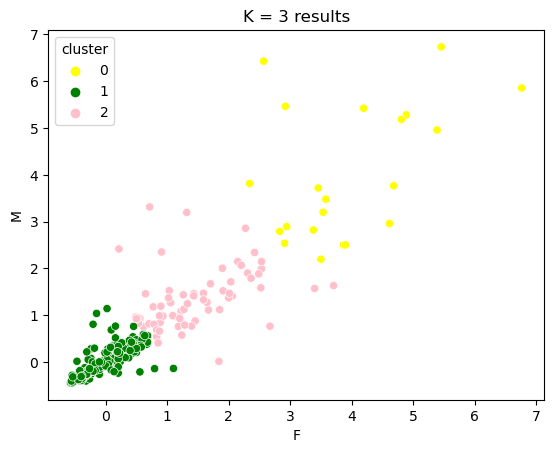

C:\Users\235ju\AppData\Local\Temp\ipykernel_268\1932668376.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_scaled['cluster'] = model.fit_predict(df_new_scaled)


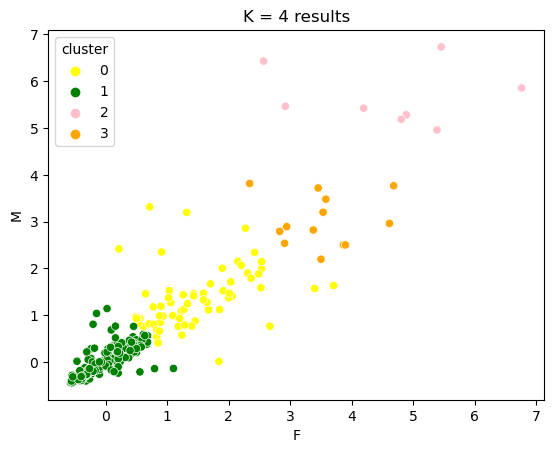

C:\Users\235ju\AppData\Local\Temp\ipykernel_268\1932668376.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_scaled['cluster'] = model.fit_predict(df_new_scaled)


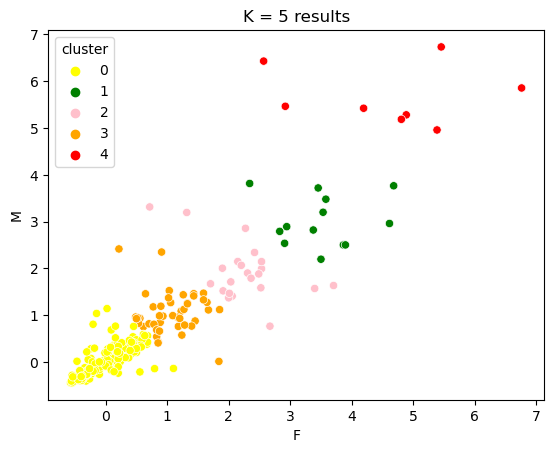

C:\Users\235ju\AppData\Local\Temp\ipykernel_268\1932668376.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_scaled['cluster'] = model.fit_predict(df_new_scaled)


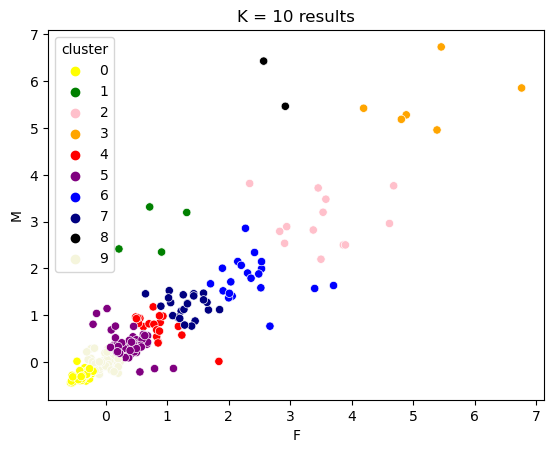

In [ ]:
# 군집들의 시각화
from sklearn.cluster import KMeans
import seaborn as sns

df_new_scaled.pop('cluster')
df_new_scaled = df_new_scaled[df_new_scaled['F'] < 8]

k = [3, 4, 5, 10]
palette = [ 'yellow', 'green', 'pink', 'orange', 'red', 'purple', 'blue', 'navy','black','beige']

for i in k:
    model = KMeans(n_clusters = i, random_state = 731)
    model.fit(df_new_scaled)
    df_new_scaled['cluster'] = model.fit_predict(df_new_scaled)
    sns.scatterplot(x='F', y='M', hue = 'cluster', data = df_new_scaled, palette = palette[:i])
    plt.title('K = %d results'%i)
    plt.show()

## 군집 결과의 적합성을 군집 내 응집도, 군집 간 분리도의 개념을 사용해서 서술

In [ ]:
# 군집 내 응집도 (Intra-Cluster Cohesion):
# :군집 내 응집도는 동일한 군집 내의 데이터 포인트들 간의 유사도 또는 거리를 측정한다.


# 군집 간 분리도 (Inter-Cluster Separation):
# :군집 간 분리도는 서로 다른 군집 간의 거리 또는 분리 정도를 측정한다.

In [ ]:
#inertia값이 작을수록 응집도가 높게 군집이 잘 된것이라 판단할 수 있음.
inertia_list = []
for i in range(2, 11):
    model = KMeans(n_clusters = i, random_state = 731)
    model.fit(df_new_scaled)
    inertia_list.append(model.inertia_)

print(inertia_list)


[1777.0720511361778, 861.709878162241, 403.3454584778792, 213.96233039680095, 159.19172547543903, 114.65218360130923, 87.00551028196548, 61.65294412292188, 41.40678622486036]


     -------------------------------------- 282.6/282.6 kB 8.8 MB/s eta 0:00:00


C:\Users\235ju\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=9), k=(1, 10))

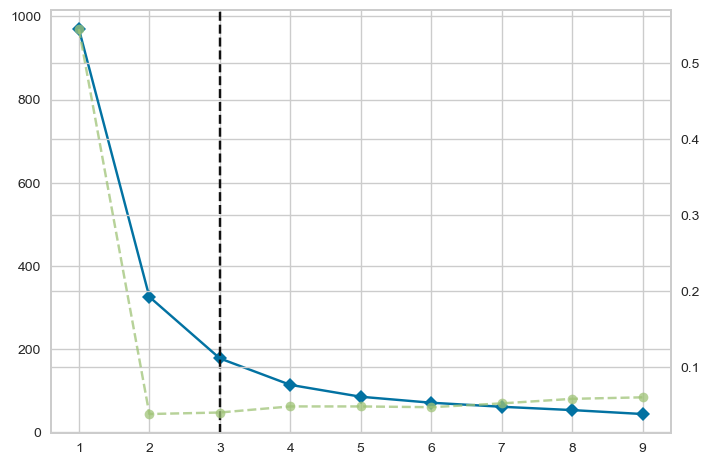

In [ ]:
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

df_new_scaled.pop('cluster')

model_test = KMeans()
visualizer = KElbowVisualizer(model_test, k=(1, 10))
visualizer.fit(df_new_scaled)

## 적합된 군집 별 특성에 대한 의견과 비즈니스적 판단 제시

In [ ]:
'''
k의 값이 3일 때 구매 빈도가 높을수록 구매 총액이 높아지는 것을 확인할 수 있다.
따라서,고객들의 구매빈도를 늘릴 수 있는 고객들에게 맞춤형 물품추천을 하는 것을 제안한다.
'''

'\nk의 값이 3일 때 구매 빈도가 높을수록 구매 총액이 높아지는 것을 확인할 수 있다.\n따라서,고객들의 구매빈도를 늘릴 수 있는 고객들에게 맞춤형 물품추천을 하는 것을 제안한다.\n'

```{admonition} 2번
**시계열분석**     

```

In [1]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem2.csv',index_col = 0)
df

,counts
0,544.3
1,603.1
2,NaN
3,533.4
4,619.5
...,...
295,445.2
296,472.0
297,341.6
298,477.8


## 2.1 EDA와 시각화를 진행하라

In [2]:
df.describe()

,counts
count,295.000000
mean,498.678305
std,97.603920
min,239.400000
25%,432.600000
50%,499.800000
75%,565.550000
max,729.200000


## 2.2 결측치 처리와 해당 결측치 처리 방식에 대한 논리적 근거를 제시하라

In [3]:
'''
결측치 처리는 대표적으로 각 표본들의 대표값으로 변경하는 방법, 혹은 결측치를 삭제하는 방법이
있다. 결측치를 삭제하는 것은 데이터의 손실을 가져오므로 결측치는 대표값중 이상치에 민감하지 않은 중앙값으로
대체하는 것이 바람직할 것으로 보인다.
'''
df['counts'].fillna(df['counts'].median(),inplace = True)

## 2.3 계절성을 반영한 시계열 모델을 제시하고 정확도 측면에서 모델 성능 평가 할 것

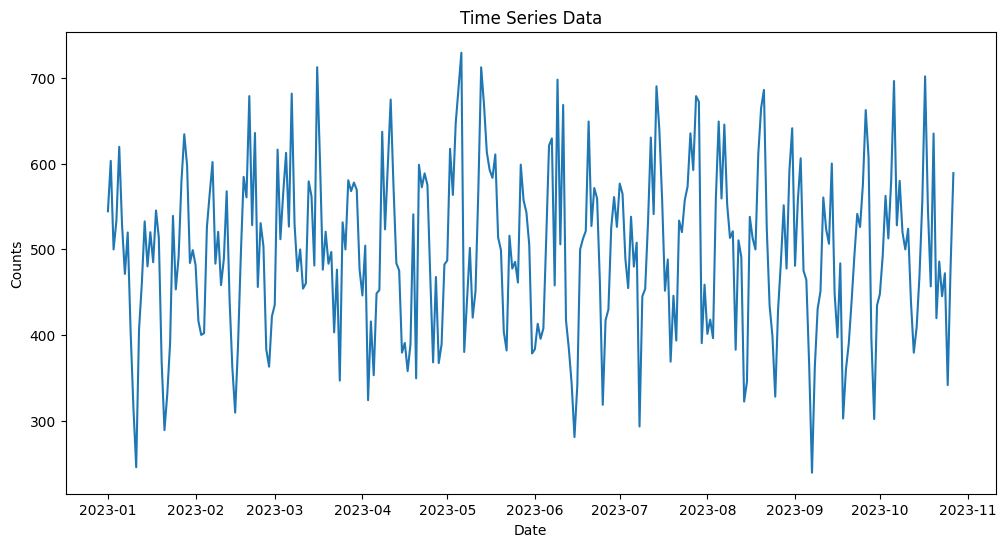

시계열 데이터는 정상성을 만족합니다.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


평균 RMSE: 70.44


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse
from sklearn.model_selection import TimeSeriesSplit

# 가상의 시계열 데이터 생성
n = 300
dates = pd.date_range(start='2023-01-01', periods=n, freq='D')
df_1 = pd.DataFrame({'Date': dates, 'Counts': df['counts'].values})
df_1

plt.figure(figsize=(12, 6))
plt.plot(df_1['Date'], df_1['Counts'])
plt.xlabel('Date')
plt.ylabel('Counts')
plt.title('Time Series Data')
plt.show()

# 정상성 검정 (Augmented Dickey-Fuller 검정)
result = adfuller(df_1['Counts'])
if result[1] <= 0.05:
    print("시계열 데이터는 정상성을 만족합니다.")
else:
    print("시계열 데이터는 정상성을 만족하지 않습니다.")

# SARIMA 모델 생성 및 훈련
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)
model =sm.tsa.statespace.SARIMAX(df_1['Counts'], order=order, seasonal_order=seasonal_order)
results = model.fit()

# 예측과 모델 성능 평가
split = TimeSeriesSplit(n_splits=5)
rmse_scores = []

for train_index, test_index in split.split(df_1['Counts']):
    train_data, test_data = df_1['Counts'][train_index], df_1['Counts'][test_index]
    model = sm.tsa.statespace.SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
    results = model.fit(disp=False)
    predictions = results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)
    rmse_score = rmse(test_data, predictions)
    rmse_scores.append(rmse_score)

average_rmse = np.mean(rmse_scores)
print(f"평균 RMSE: {average_rmse:.2f}")




## 2.4 분석 결과 활용 가능 여부에 대한 분석 전문가로서의 제안

In [7]:
#5월에 가장 많은 방문객이 방문하는 것으로 보이며 겨울 시즌에는 방문객이 다소 적음을 알 수 있다.
# 방문객이 가장 많은 5월달에 방문객을 늘리는 것이 바람직할 것으로 보인다.

## 3-1
서울에서 영동까지 100km/h로 가고 영동에서 서울까지 80km/로 돌아왔을 때, 평균 속도는?


In [ ]:
print('서울 -> 영동 평균속도 :  100 km / 100 km/h이므로 평균속도는 100km/h')
print(f'영동 -> 서울 평균속도 : 100km/80km/h 이므로 이동시간은 {100/80}시간이며 평균속도는 80km/h')
print(f'이 둘의 조화평균을 구하면  {round((2 * 100* 80)/ (100 + 80),2)}이다. 따라서 평균속도는  {round((2 * 100* 80)/ (100 + 80),2)} km/h이다.')

서울 -> 영동 평균속도 :  100 km / 100 km/h이므로 평균속도는 100km/h
영동 -> 서울 평균속도 : 100km/80km/h 이므로 이동시간은 1.25시간이며 평균속도는 80km/h
이 둘의 조화평균을 구하면  88.89이다. 따라서 평균속도는  88.89 km/h이다.


## 3-2
3년동안 연매출이 3000, 4000, 5000이었다면 연평균성장률을 구하시오


In [ ]:
import numpy as np
a = ((4000-3000)/3000) + 1
b = ((5000-4000)/4000) + 1

ratio = np.sqrt(a*b)
print(ratio)

1.2909944487358056


## 3-3
어느 마라톤 대회에 참가한 50명의 동호회 회원 중 마라톤에서 완주한 회원 수와 기권한 회원 수가 다음과 같다
|구분|남성|여성|
|:---|:---:|:---:|
|완주한 회원 수|27|9|
|기권한 회원 수|8|6|

참가한 회원 중에서 임의로 선택한 한명의 회원이 여성이었을 때, 이 회원이 마라톤에서 완주하였을 확률은?

In [ ]:
p_A = (9+6)/50
p_AandB = 9/50
res = p_AandB/p_A
res

0.6

## 3-4
표본 10개의 분산이 90일 때 신뢰도 95%로 모분산의 신뢰구간을 추정


In [ ]:
n = 10
s_squared = 90
chi_1 = 2.70
chi_2 = 19.02

lower_bound = ((n-1)*s_squared) / (chi_2)
upper_bound = ((n-1)*s_squared) / (chi_1)

print(lower_bound, upper_bound)

42.586750788643535 300.0


## 4
정규모집단으로부터 크기가 9인 표본을 추출하여 평균과 표준편차를 계산하였더니 각각 $\bar x$=8.3과 s=1.2였다고한다. 모평균 $\mu$에 대한 95% 신뢰구간을 구하고, 유의수준 5%로 가설 $H0$: $\mu$=8.5 대 $H1$ : $\mu$ $\ne$ 8.5를검정하라.


In [ ]:
import numpy as np
from scipy.stats import t

sample_mean = 8.3
sample_std = 1.2
sample_size = 9
confidence_level = 0.95

# 자유도 (n - 1)
degrees_of_freedom = sample_size - 1

# 신뢰수준에 따른 t-분포 양측 임계값 (95% 신뢰수준)
alpha = 1 - confidence_level
alpha_over_2 = alpha / 2
t_critical = t.ppf(1 - alpha_over_2, degrees_of_freedom)

# 신뢰구간 계산
margin_of_error = t_critical * (sample_std / np.sqrt(sample_size))
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"95% 신뢰구간: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")

# 귀무가설의 모평균
null_hypothesis_mean = 8.5

# t-검정 통계량 계산
t_statistic = (sample_mean - null_hypothesis_mean) / (sample_std / np.sqrt(sample_size))

# 양측 검정을 위한 임계값 (5% 유의수준)
alpha = 0.05
t_critical_left = t.ppf(alpha / 2, degrees_of_freedom)
t_critical_right = -t_critical_left

# 결과 출력
print(f"t-검정 통계량: {t_statistic:.2f}")

if t_statistic < t_critical_left or t_statistic > t_critical_right:
    print("귀무가설을 기각. 대립가설을 채택.")
else:
    print("대립가설 기각. 귀무가설을 채택")


95% 신뢰구간: (7.38, 9.22)
t-검정 통계량: -0.50
대립가설 기각. 귀무가설을 채택


## 5
공장 X,Y,Z의 평균 출하 소요시간을 여러 일자에 거쳐 측정한 데이터이다. 각 공장의 중위수의 차이가 존재하는지 확인하려 한다  
- 5.1 귀무가설과 연구가설을 제시하시오
- 5.2 검정 후 귀무가설 기각 여부 제시


In [ ]:
import pandas as pd
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem5.csv',encoding='cp949')
df.head()

,출하 소요시간,공장명,공장별 출하 소요시간 순위
0,71,Z,11
1,75,X,14
2,71,X,12
3,53,Z,1
4,50,X,1


In [ ]:
'''
귀무가설 : 세 공장의 평균 출하 소요시간의 중위수에는 차이가 있다고 말할 수 없다.
대립가설 : 적어도 세 공장중 하나는 평균 출하 소요시간의 중위수는 차이가 있다고 말할 수 있다.
'''
fac_X = list(df.loc[df['공장명'] == 'X','출하 소요시간'])
fac_Y = list(df.loc[df['공장명'] == 'Y','출하 소요시간'])
fac_Z= list(df.loc[df['공장명'] == 'Z','출하 소요시간'])



statistic, p_value = stats.kruskal(fac_X, fac_Y, fac_Z)

alpha = 0.05
print(f"검정 통계량 (Kruskal-Wallis H): {statistic}")
print(f"유의확률 (p-value): {p_value}")

if p_value < alpha:
    print("적어도 세 공장중 하나는 평균 출하 소요시간의 중위수는 차이가 있다고 말할 수 있다.")
else:
    print("세 공장의 평균 출하 소요시간의 중위수에는 차이가 있다고 말할 수 없다.")



검정 통계량 (Kruskal-Wallis H): 0.7217886080379153
유의확률 (p-value): 0.6970526702392181
세 공장의 평균 출하 소요시간의 중위수에는 차이가 있다고 말할 수 없다.


## 6
아래는 A사의 투자안별 투자금과 순현재가치 (NPV) 이다. 투자금을 1개차 50억원, 2개차 60억원, 3개차 70억원으로 결정했다면, 최대의 NPV는 얼마이고 최적의 투자안은 어떤 것인지 선정하시오.


|투자안|1년차 투자금 (억원)|2년차 투자금 (억원)|3년차 투자금 (억원)|NPV(억원)|
|:---|:---:|:---:|:---:|:---:|
|1안|23|23|15|30|
|2안|15|15|12|20|
|3안|17|25|12|31|
|4안|16|12|13|42|
|5안|24|23|17|44|



In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(data = {"1개년" : [1.1, 1.15, 1.12, 1.13, 1.16],
                         "2개년" : [1.2, 1.14, 1.11, 1.25, 1.30],
                         "3개년" : [1.15, 1.19, 1.3, 1.2, 1.24]},
                 index = ['1안', '2안', '3안', '4안', '5안'])
df_array = df.to_numpy()
# print(df_array)

budget = np.array([50, 60, 70])
# print(budget)

NPV = df_array.dot(budget)
print(NPV)
print('5안이 최적의 투자안이다. ')

[207.5 209.2 213.6 215.5 222.8]
5안이 최적의 투자안이다. 
